# Assignment for Time Series Analysis

Install and download these packages first

```
pip install matplotlib numpy scipy pandas 
```

In [728]:
import matplotlib.pyplot as plt
import matplotlib._color_data as mcd
from datetime import datetime
import pandas as pd
from pandas.plotting import lag_plot
import numpy as np
import seaborn as sns
import glob
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')
%matplotlib inline

sns.set()

### Set Plotting colors

In [423]:
"""
Get all colors from matplotloib._color_data
""" 

overlap = {name for name in mcd.CSS4_COLORS
           if "xkcd:" + name in mcd.XKCD_COLORS}
names = []
cn = []
xkcd = []
for j, n in enumerate(sorted(overlap, reverse=False)):
    cn.append(mcd.CSS4_COLORS[n])
    xkcd.append(mcd.XKCD_COLORS["xkcd:" + n].upper())
    if cn == xkcd:
        weight = 'bold'
    names.append({n,j})

#names

## Extract and  out all the available data sets

In [424]:
import glob

csv_files = [f for f in glob.glob("csv_data/*.csv")]
file_names = []
for i,v in enumerate(csv_files):
    fold,data_name = v.split("csv_data/")
    data_name,file_end = data_name.split(".csv")
    file_names.append(data_name)
    print(data_name)


RestaurantVisitors
starbucks
population_by_state
BeerWineLiquor
MaunaLoaDailyTemps
rhine_river_discharge
monthly_milk_production
Miles_Traveled
danube_river_discharge
RideAustin
HospitalityEmployees
PCEPersonalSpending
uspopulation
samples
EnergyProduction
DailyTotalFemaleBirths
M2SLMoneyStock
price_of_ground_chuck
PriceIndexCatFood
PriceIndexDogFood
PublishingEmployees
macrodata
co2_mm_mlo
Retail_Sales_Beer_Liquor
UMTMVS
TradeInventories
MtWashingtonDailyTemps
Alcohol_Sales
population_by_county
airline_passengers
Food_Products_Value


### Plot all the datasets

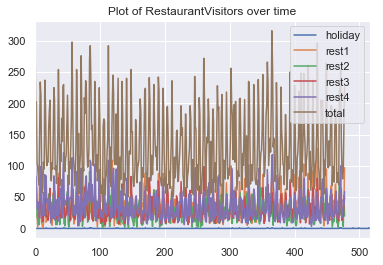

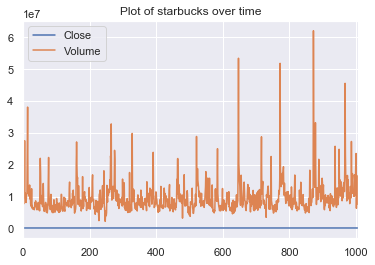

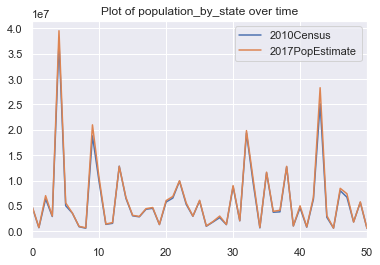

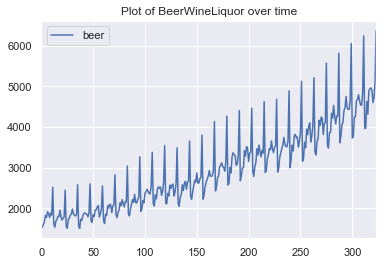

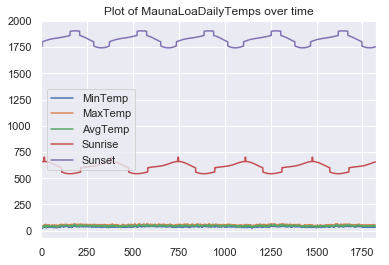

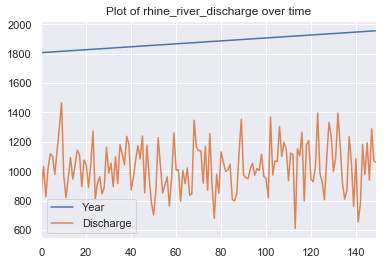

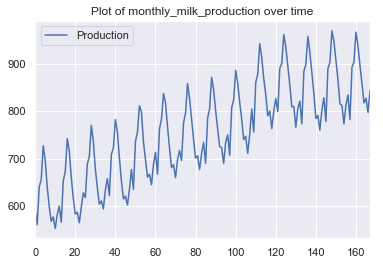

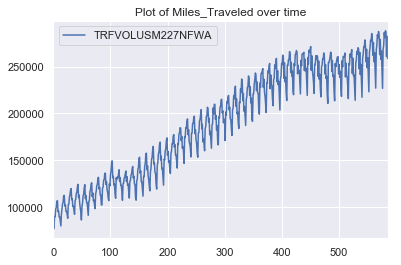

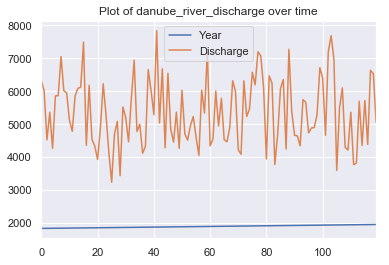

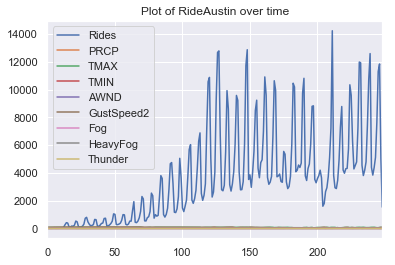

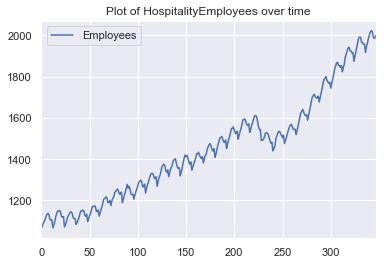

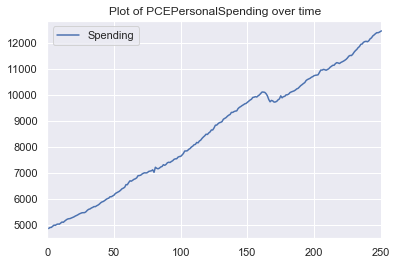

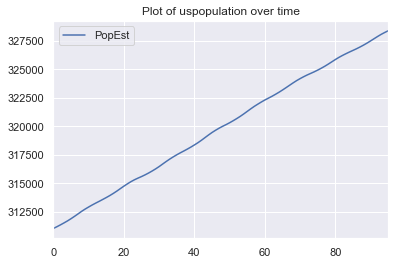

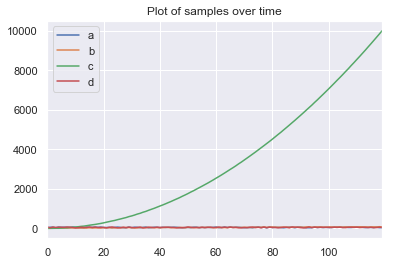

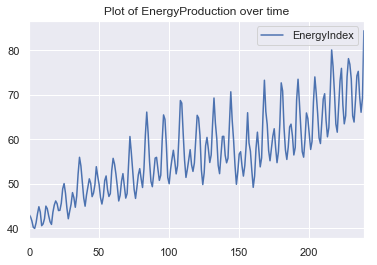

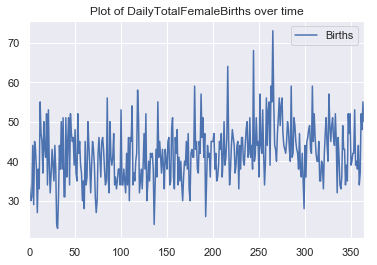

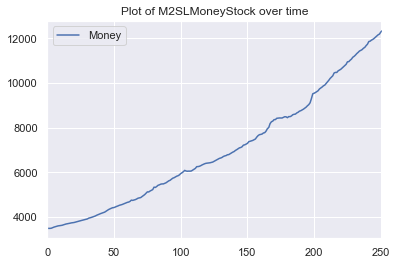

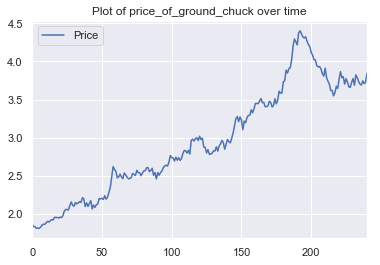

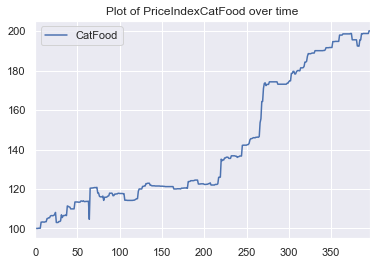

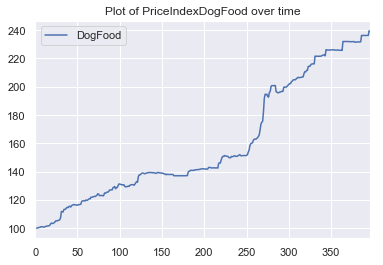

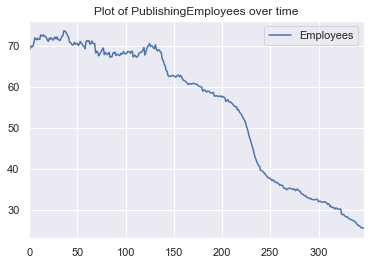

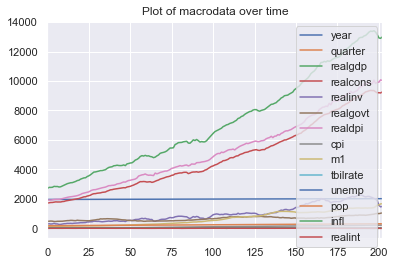

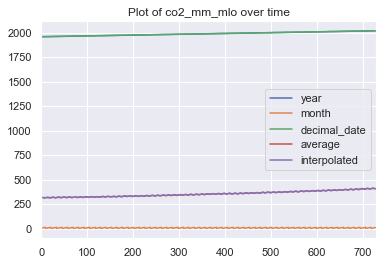

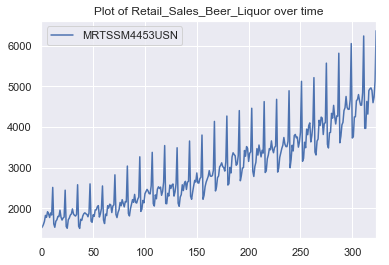

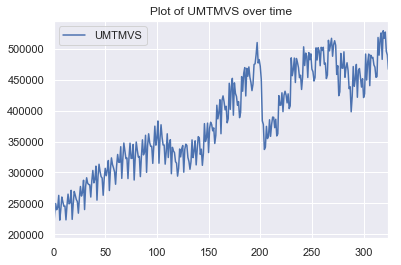

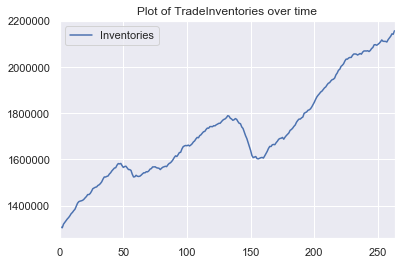

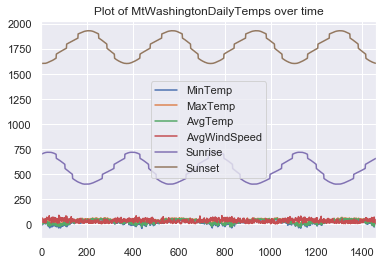

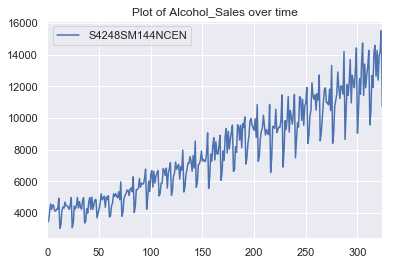

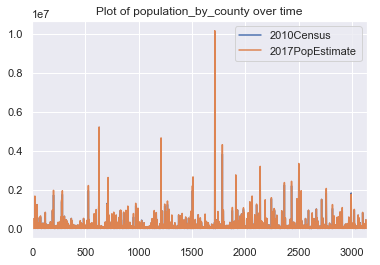

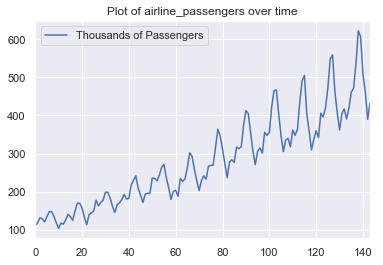

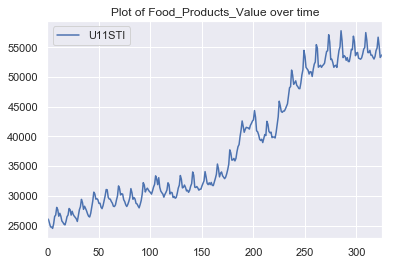

In [4]:
for i,v in enumerate(csv_files):
    d = pd.read_csv(v)
    ax = d.plot(title='Plot of {} over time'.format(file_names[i]))


### Look at the data of interest

In [429]:
df1 = pd.read_csv('csv_data/DailyTotalFemaleBirths.csv', index_col='Date',parse_dates=True)
df1.head()
df.describe()

,Births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


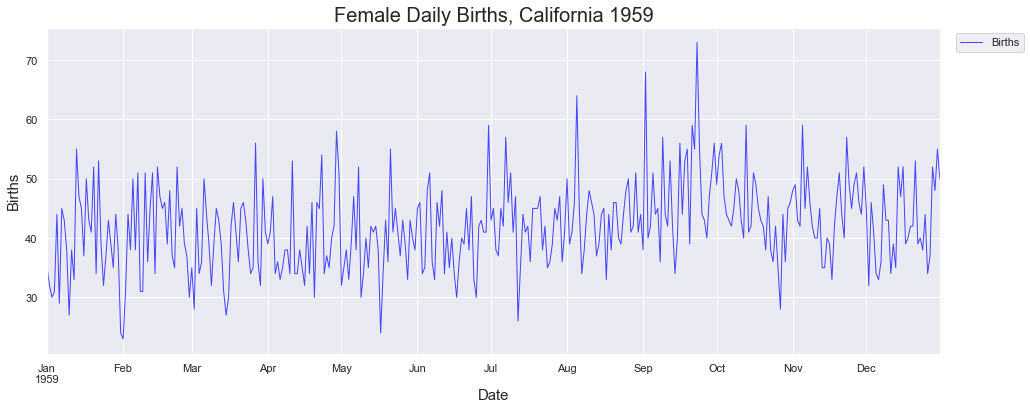

In [428]:
title,xlabel,ylabel = "Female Daily Births, California 1959","Date","Births"
ax = df1['Births'].plot.line(figsize=(16,6),ls="-",c="Blue",alpha=0.7,lw=1)
ax.set_title(title,fontsize=20)
ax.set_xlabel(xlabel,fontsize=15)
ax.set_ylabel(ylabel,fontsize=15)
ax.legend(loc=0,bbox_to_anchor=(1.1,1.0))

## Extract ACF and PACF
![title](corr.png)

In [734]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf,acovf,pacf,pacf_ols,pacf_yw

# We can make trending and stationary data look like stationary data by differencing
# B*Delta

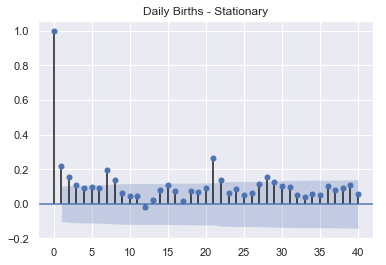

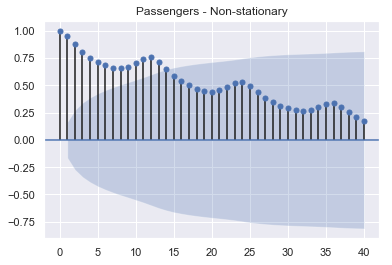

In [735]:
# Plot ACF
plot_acf(df1,lags=40,title='Daily Births - Stationary'); # Stationary <-- Works best  
plot_acf(df2,lags=40,title='Passengers - Non-stationary');   # Non stationary


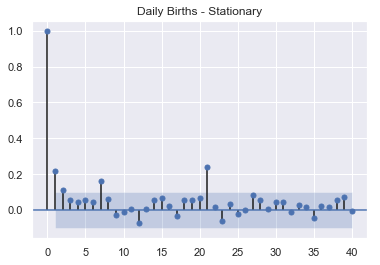

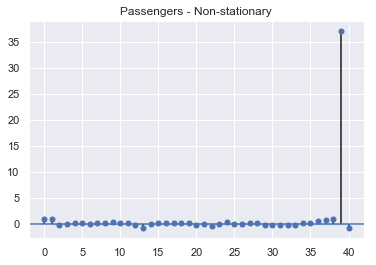

In [736]:
# Plot PACF
plot_pacf(df1,lags=40,title='Daily Births - Stationary'); # Stationary <-- Works best  
plot_pacf(df2,lags=40,title='Passengers - Non-stationary');   # Non stationary


Daily Births


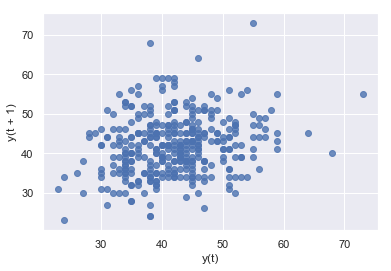

In [738]:
ax1 = lag_plot(df1['Births'],c='b',alpha=0.8)
print('Daily Births')

Thousands of Passengers


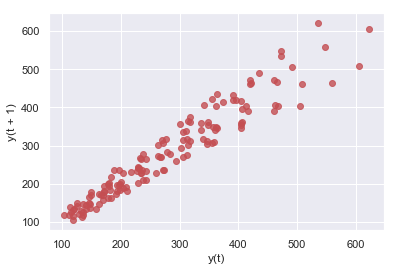

In [739]:
ax2 = lag_plot(df2['Thousands of Passengers'],c='r',alpha=0.8)
print('Thousands of Passengers')

In [740]:
# Partial Autocorrelation estimated with non-recursive Yule-Walker
print(pacf_yw(df1,nlags=4,method='mle'))       # Maximum likelyhood estimate
print(pacf_yw(df1,nlags=4,method='unbiased'))  # Unbiased estimate


# Partial Autocorrelation estimated with ordinary least squared 
print(pacf_ols(df1,nlags=4))

[1.         0.21724118 0.11091851 0.05800643 0.04543103]
[1.         0.217838   0.11156041 0.05852814 0.0459786 ]
[1.         0.2179641  0.11388341 0.06139271 0.05014092]


## We now check for stationarity in the data sets
### For reference, another data set has been included that is non-stationary (airline_passengers.csv)

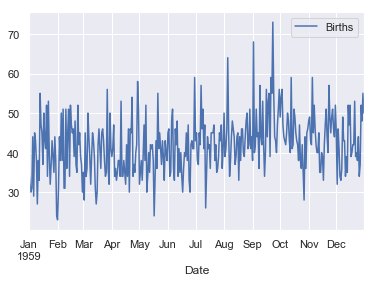

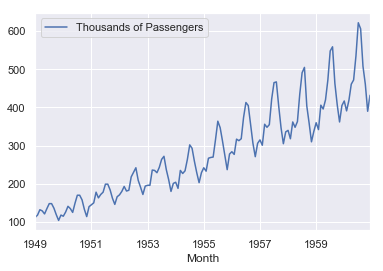

In [741]:
# Use lagplot to build ACF plots
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


# Stationary
df1 = pd.read_csv('csv_data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df1.index.freq = 'D'

# Non stationary
df2 = pd.read_csv('csv_data/airline_passengers.csv',index_col='Month',parse_dates=True)
df2.index.freq = 'MS'

# Regular plot
df1.plot()
df2.plot()


# Descriptive statistics test   
#### We will use the Dickey-Fuller test for testing stationarity in a data set
__Dickey-Fuller Test__ A test for testing stationarity    
We start to assume that \theta = 1 as the null hypothesis  
  
IF p < 0.005, (the probability) then we reject the null hypothesis  
IF p > 0.05, we fail to reject null hypothesis  
  
__Granger Causality Test__  
Used to see indications of inside causality, but it does **NOT** account for outside factors   
  
We have used MSE,MAE,RMSE    
  
  AIC - Akaike Information Criteria - One of the moste cited papers   
Estimates  
   
BIC - Bayesian Information Criteria - Simular to AIC, but uses Bayesian statistics   


## Check stationary manually

In [742]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df1['Births'])
dfout = pd.Series(dftest[0:4],index=['ADF Test Statistic','p-value','# Lags Used','# Observations'])

for key,val in dftest[4].items():
    dfout[f'critical value ({key})'] = val

dfout

ADF Test Statistic       -4.808291
p-value                   0.000052
# Lags Used               6.000000
# Observations          358.000000
critical value (1%)      -3.448749
critical value (5%)      -2.869647
critical value (10%)     -2.571089
dtype: float64

### Now automate checking stationarity by 
#### Implementing "augmented Dickey-Fuller test" 

In [743]:
# Function for running the augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """ Pass in time series and recive the ADF report """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC')
    
    labels = ['ADF test statistics','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    
    for key,value in result[4].items():
        out[f'critical value ({key})'] = value
        
    print(out.to_string())
    
    # Check null hypothesis
    if result[1] <= 0.05:
        print("Reject Null Hypothesis")
        print("Data has no unit root and is STATIONARY") 
    else: 
        print("Fail to reject Null Hypothesis")
        print("Data has a unit root and is NON-STATIONARY")
        

Augmented Dickey-Fuller Test: 
ADF test statistics      -4.808291
p-value                   0.000052
# lags used               6.000000
# observations          358.000000
critical value (1%)      -3.448749
critical value (5%)      -2.869647
critical value (10%)     -2.571089
Reject Null Hypothesis
Data has no unit root and is STATIONARY


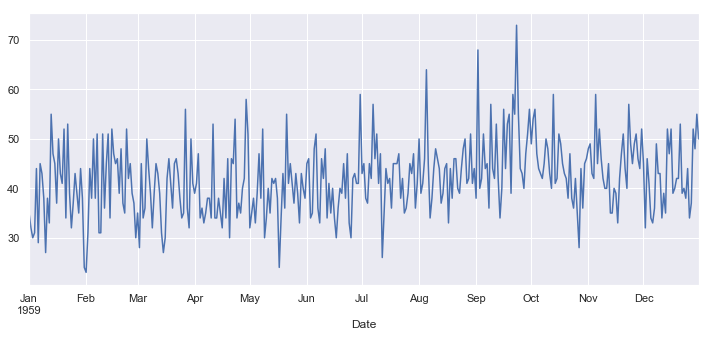

In [745]:
# Check stationarity in our data set
df1['Births'].plot(figsize=(12,5))
adf_test(df1['Births'])

#### We can now use the function "adf_test" to test stationarity

# Seasonal decomposition and Holts winter model

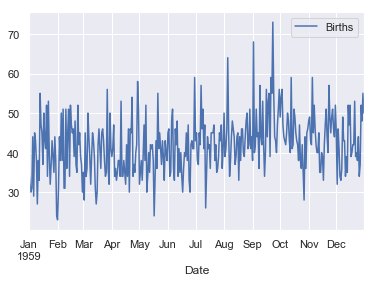

In [747]:
import pandas as pd
import pandas_datareader as pdr
import statsmodels.tsa
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import arma2ma


# Lets fo some ETS decomposition
df1 = pd.read_csv('csv_data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df1.dropna(inplace=True)
df1.plot()

### Simple moving average

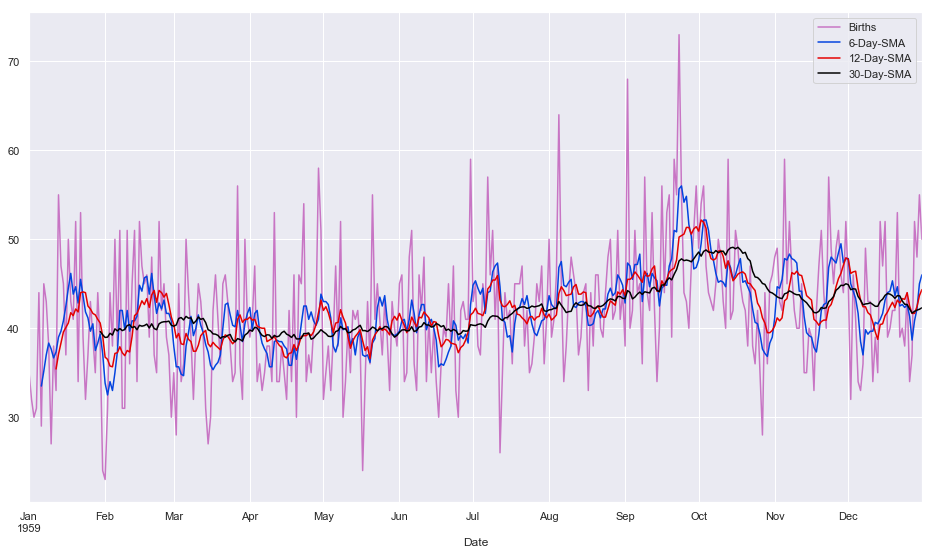

In [774]:
df1.index
df1['3-Day-SMA']  = airline['Births'].rolling(window=3).mean()
df1['6-Day-SMA']  = airline['Births'].rolling(window=6).mean()
df1['12-Day-SMA'] = airline['Births'].rolling(window=12).mean()
df1['30-Day-SMA'] = airline['Births'].rolling(window=30).mean()

df1['Births'].plot(figsize=(16,9),c=xkcd[32],alpha=1,legend=True)
df1['6-Day-SMA'].plot(c=xkcd[5],alpha=1,legend=True)
df1['12-Day-SMA'].plot(c=xkcd[36],legend=True)
df1['30-Day-SMA'].plot(c=xkcd[4],legend=True)

### Exponential moving average

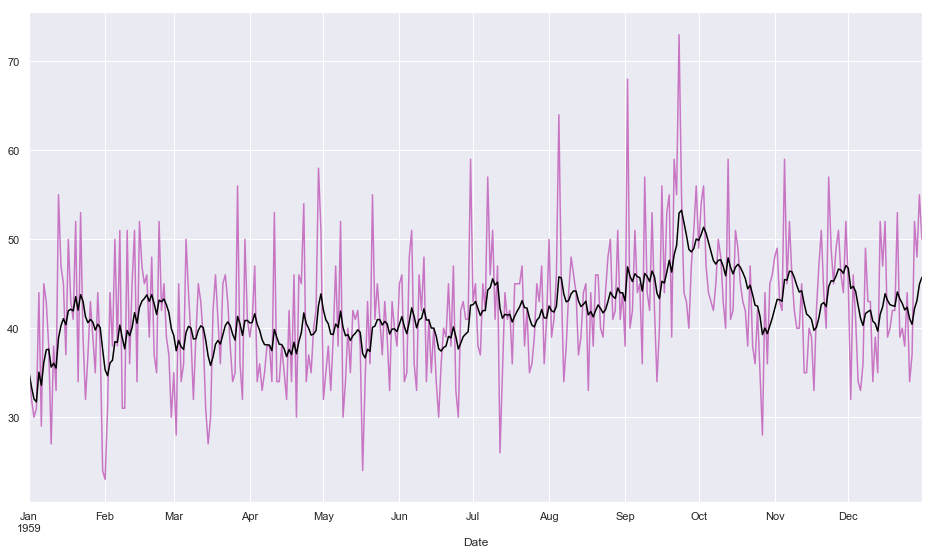

In [776]:
df1['EWMA-12'] = airline['Births'].ewm(span=12).mean()
df1['Births'].plot(figsize=(16,9),c=xkcd[32])
df1['EWMA-12'].plot(figsize=(16,9),c=xkcd[4])

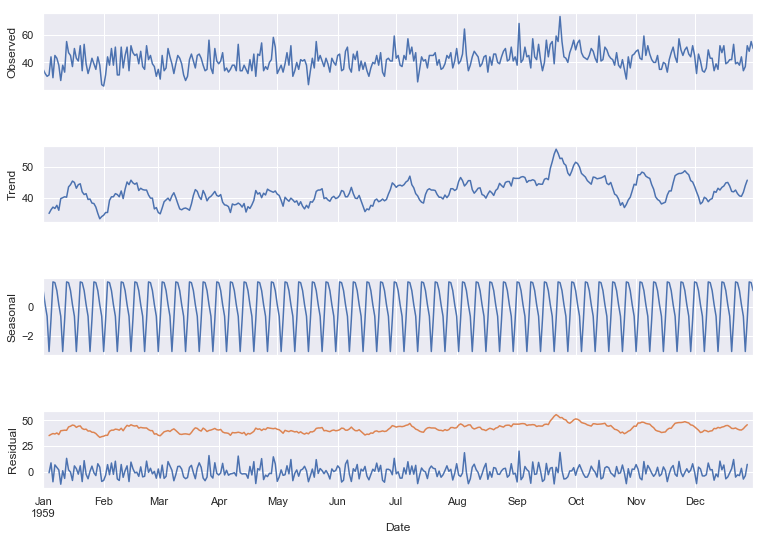

In [764]:
result = seasonal_decompose(df1['Births'],model='Multiplicative')
result.trend
result.seasonal
result.resid
result.plot();
result.trend.plot(figsize=(12,9))

# We see that it apperas the data is not seasonal


### We plot the exponential and simple moving average of the data and notice that the plots are the same

In [777]:
# " Holt Winters method "
import pandas as pd
import pandas_datareader as pdr
import statsmodels.tsa
from statsmodels.tsa.holtwinters import SimpleExpSmoothing


# Lets fo some ETS decomposition
df1 = pd.read_csv('csv_data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df1.index.freq = 'D'     # Monthly start
df1.dropna(inplace=True)

# Simple Exp. Smoothing
span_12 = 12
alpha_12 = 2/(span_12+1)
span_30 = 365
alpha_30 = 2/(span_30+1)
span_365 = 365
alpha_365 = 2/(span_365+1)


df1['EWMA12'] = df1['Births'].ewm(alpha=alpha_12,adjust=False).mean()
df1['EWMA30'] = df1['Births'].ewm(alpha=alpha_30,adjust=False).mean()
df1['EWMA365'] = df1['Births'].ewm(alpha=alpha_365,adjust=False).mean()
df1.head()


,Births,EWMA12,EWMA30,EWMA365
Date,,,,
1959-01-01,35,35.000000,35.000000,35.000000
1959-01-02,32,34.538462,34.983607,34.983607
1959-01-03,30,33.840237,34.956374,34.956374
1959-01-04,31,33.403277,34.934754,34.934754
1959-01-05,44,35.033542,34.984291,34.984291



We see that the exponential moving average and the simple moving average gives the same plot


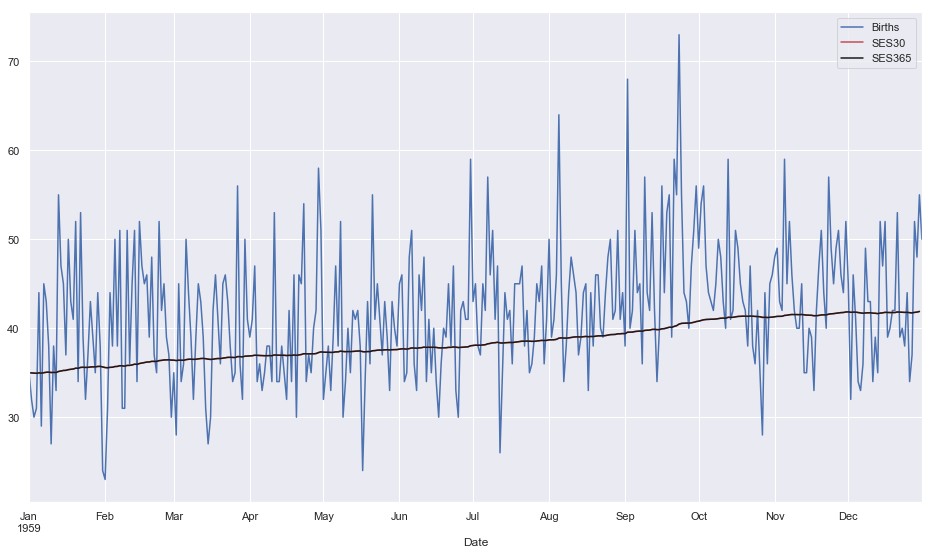

In [779]:
df1['SES12'] = SimpleExpSmoothing(df1['Births']).fit(smoothing_level=alpha_12,optimized=False).fittedvalues.shift(-1)
df1['SES30'] = SimpleExpSmoothing(df1['Births']).fit(smoothing_level=alpha_30,optimized=False).fittedvalues.shift(-1)
df1['SES365'] = SimpleExpSmoothing(df1['Births']).fit(smoothing_level=alpha_365,optimized=False).fittedvalues.shift(-1)
df1.head()
df1['Births'].plot(figsize=(16,9),legend=True)
df1['SES30'].plot(c='r',legend=True)
df1['SES365'].plot(c='k',legend=True)

print('\nWe see that the exponential moving average and the simple moving average gives the same plot')


## We now make a forcasting based on the Holts winter method

In [770]:
# " Holt Winters method "
import pandas as pd
import pandas_datareader as pdr
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Divide into train and test data 80/20
len_train = int(len(airline)*0.8 + 1)

# Lets fo some ETS decomposition
airline = pd.read_csv('csv_data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
airline.index.freq = 'D'     # Monthly start
airline.dropna(inplace=True)

airline.info()  # 365 entries - Idealy split 80/20
train_data = airline.iloc[:len_train]
test_data = airline.iloc[len_train:]



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 1959-01-01 to 1959-12-31
Freq: D
Data columns (total 1 columns):
Births    365 non-null int64
dtypes: int64(1)
memory usage: 5.7 KB


In [771]:
fitted_model = ExponentialSmoothing(train_data['Births'],
                                    trend=None,
                                    seasonal=None,
                                    seasonal_periods=12).fit()

test_predictions = fitted_model.forecast(len(test_data))
# test_predictions

### Plot 

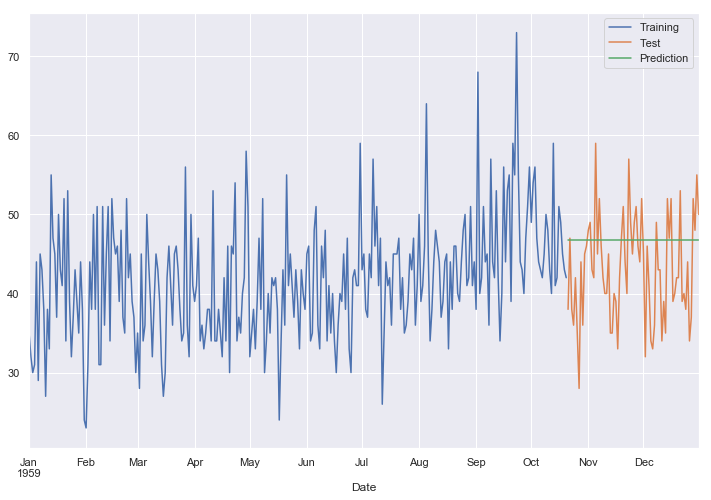

In [772]:
train_data['Births'].plot(legend=True,label='Training',figsize=(12,8))
test_data['Births'].plot(legend=True,label='Test')

test_predictions.plot(legend=True,label='Prediction')

### Plot only test against prediction

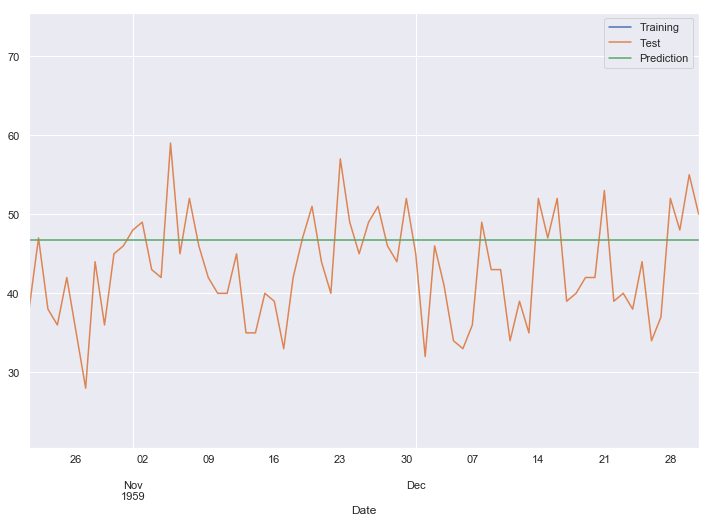

In [773]:
train_data['Births'].plot(legend=True,label='Training',figsize=(12,8))
test_data['Births'].plot(legend=True,label='Test')

test_predictions.plot(legend=True,label='Prediction',xlim=['1959-10-21','1959-12-31'])

### Evaluate the prediction with metrics

In [469]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

test_data.describe()
MSE = mean_squared_error(test_data,test_predictions)
MAE = mean_absolute_error(test_data,test_predictions)

print("Mean squared error of prediction: {}".format(MSE))
print("Mean absolute error of prediction: {}".format(MAE))

Mean squared error of prediction: 52.69648464839281
Mean absolute error of prediction: 5.961096806923589


# AR models

### Test AR(1) models

In [780]:
from statsmodels.tsa.arima_model import ARMA,ARIMA,ARMAResults,ARIMAResults,AR
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima

In [781]:
# Fit AR(1) model
model = AR(train_data)
AR1fit = model.fit(maxlag=1)

print("AR coefficient: {}".format(AR1fit.aic))  # AR coeficcient
print("p-value: {}".format(AR1fit.k_ar)) # value of p = 1
AR1fit.params

AR coefficient: 4.012656862921102
p-value: 1


const        33.282442
L1.Births     0.202801
dtype: float64

### Prediction with AR(1) model

In [782]:
start = len(train_data)
end = len(train_data) + len(test_data) -1

In [783]:
prediction1 = AR1fit.predict(start=start,end=end)
prediction1 = prediction1.rename('AR(1) Prediction')
#prediction1


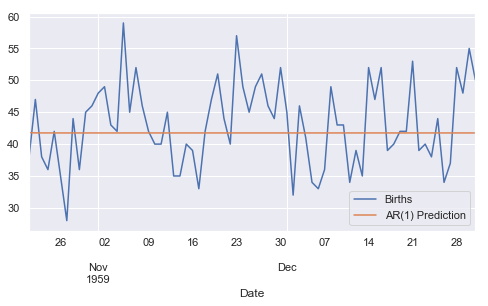

In [784]:
test_data.plot(figsize=(8,4),legend=True)
prediction1.plot(legend=True)

### Import evaluation metric

In [537]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

test_data.describe()
MSE = mean_squared_error(test_data,prediction1)
MAE = mean_absolute_error(test_data,prediction1)

print("Mean squared error of prediction: {}".format(MSE))
print("Mean absolute error of prediction: {}".format(MAE))

Mean squared error of prediction: 43.47835047402371
Mean absolute error of prediction: 5.362478832419703


### Make AR(2) prediciton

In [540]:
AR2fit = model.fit(maxlag=2)
AR2fit.params

prediction2 = AR2fit.predict(start=start,end=end)
prediction2 = prediction2.rename('AR(2) Prediction')
#prediction2

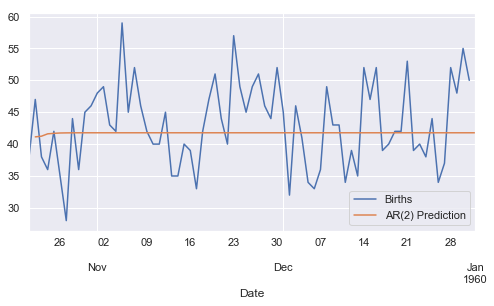

In [541]:
test_data.plot(figsize=(8,4),legend=True)
prediction2.plot(legend=True)

### Make evaluation

In [542]:
test_data.describe()
MSE = mean_squared_error(test_data,prediction2)
MAE = mean_absolute_error(test_data,prediction2)

print("Mean squared error of prediction: {}".format(MSE))
print("Mean absolute error of prediction: {}".format(MAE))

Mean squared error of prediction: 43.40373051124104
Mean absolute error of prediction: 5.358213451465086


## We will not the Statmodel package figure out the best value for p in AR(p)

In [543]:
"""
ic is the Criterion used for selecting the optimal lag length.
    aic - Akaike Information Criterion
    bic - Bayes Information Criterion
    t-stat - Based on last lag
    hqic - Hannan-Quinn Information Criterion
"""
ARfit = model.fit(ic='t-stat')
ARfit.params  # Chose 8 parameters or lags

const        16.894051
L1.Births     0.122264
L2.Births     0.062439
L3.Births     0.021437
L4.Births     0.025256
L5.Births     0.044038
L6.Births     0.034323
L7.Births     0.176393
L8.Births     0.111862
dtype: float64

In [544]:
prediction8 = ARfit.predict(start=start,end=end)
prediction8 = prediction8.rename('AR(8) Prediction')
#prediction8

In [288]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

# compare old with new model
labels = ['AR1','AR2','AR8']
pred = [prediction1,prediction2,prediction8]

In [545]:
for i in range(len(pred)):
    error_mse = mean_squared_error(test_data,pred[i])
    error_mae = mean_absolute_error(test_data,pred[i])
    print(f'{labels[i]} MSE was :{error_mse}')
    #print(f'{labels[i]} MSE was :{error_mae}')
    print('\n---------------------------')

AR1 MSE was :43.47835047402371

---------------------------
AR2 MSE was :43.40373051124104

---------------------------
AR8 MSE was :42.91715996286318

---------------------------


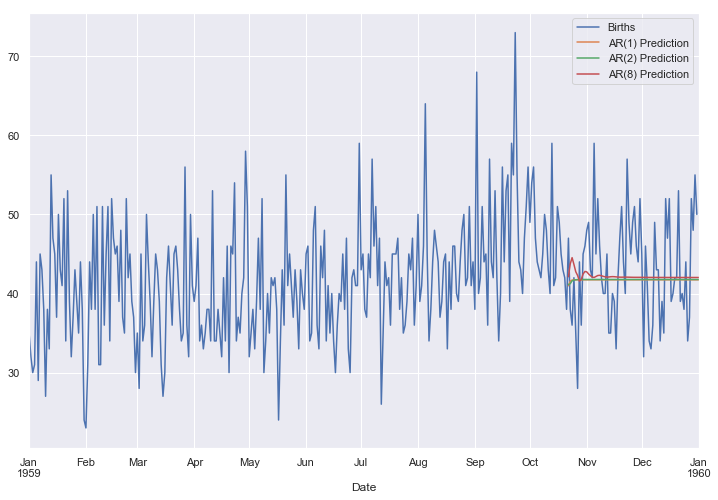

In [720]:
# Plot all predictions and compare 
df1.plot(figsize=(12,8),legend=True)
prediction1.plot(legend=True)
prediction2.plot(legend=True)
prediction8.plot(legend=True)

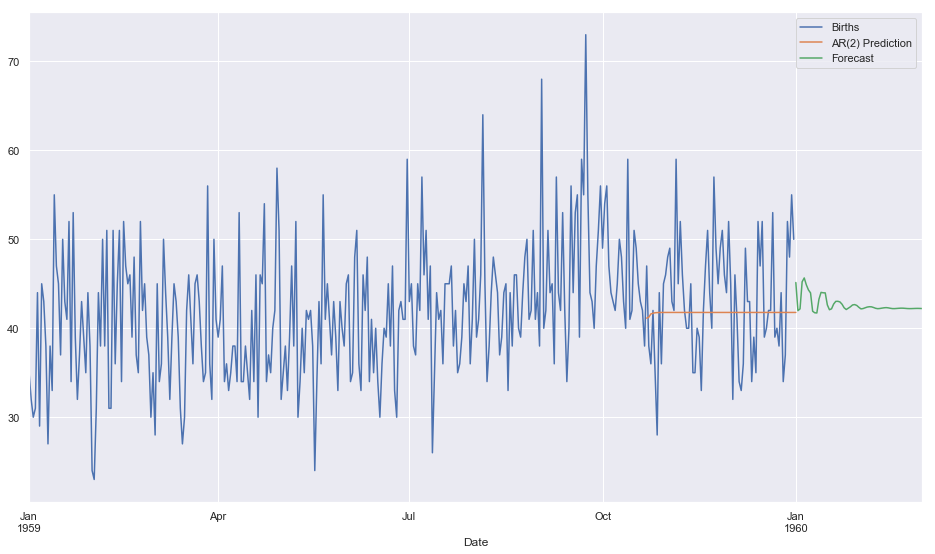

In [721]:
# Now make forecast

model = AR(df1['Births'])
ARfit = model.fit()

# If we have a year of data, we should only forecast at maximum one year ahead
forecasted_values = ARfit.predict(start=len(df1),end=len(df1)+60).rename('Forecast')


df1['Births'].plot(figsize=(16,9),legend=True)
prediction2.plot(legend=True)
forecasted_values.plot(legend=True)

# ARIMA Models - Choosing parameters  
  
p = # lag observations included in model  
d = # Number of times to differentiate raw data  
q = Size of window for moving an averaging window over  
  
### Choose AR(k) model if sharp decline after observation 'k'  <- Use PACF
### Choose MA() model if gradual decline                                    <- Use ACF   
## Most often use grid search model to find parameters
 

In [566]:
import pandas as pd 
import numpy as np
%matplotlib inline

from pmdarima import auto_arima


df1 = pd.read_csv('csv_data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df1.index.freq = 'D'

#df2 = pd.read_csv('csv_data/airline_passengers.csv',index_col='Month',parse_dates=True)
#df2.index.freq = 'MS'


### Make grid search for best ARIMA parameters

In [567]:
# Lower AIC and BIC scores == Better
stepwise_fit = auto_arima(df1['Births'],
                          start_p=0,
                          start_q=0,
                          max_p=6,
                          max_q=3,
                          seasonal=False,
                          trace=True)


Fit ARIMA: order=(0, 1, 0); AIC=2650.760, BIC=2658.555, Fit time=0.005 seconds
Fit ARIMA: order=(1, 1, 0); AIC=2565.234, BIC=2576.925, Fit time=0.025 seconds
Fit ARIMA: order=(0, 1, 1); AIC=2463.584, BIC=2475.275, Fit time=0.082 seconds
Fit ARIMA: order=(1, 1, 1); AIC=2460.154, BIC=2475.742, Fit time=0.209 seconds
Fit ARIMA: order=(1, 1, 2); AIC=2460.514, BIC=2480.000, Fit time=0.525 seconds
Fit ARIMA: order=(2, 1, 2); AIC=2461.874, BIC=2485.257, Fit time=0.620 seconds
Fit ARIMA: order=(2, 1, 1); AIC=2461.271, BIC=2480.757, Fit time=0.484 seconds
Total fit time: 1.955 seconds


In [577]:
stepwise_fit.summary() # Specifies which one it think we should use

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  364
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1226.077
Method:                       css-mle   S.D. of innovations              7.000
Date:                Sun, 19 May 2019   AIC                           2460.154
Time:                        17:10:45   BIC                           2475.742
Sample:                             1   HQIC                          2466.350
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0152      0.014      1.068      0.286      -0.013       0.043
ar.L1.D.y      0.1299      0.056      2.334      0.020       0.021       0.239
ma.L1.D.y     -0.9694      0.019    -51.415      0.000      -1.006      -0.932
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            7.6996           +0.0000j            7.6996            0.0000
MA.1            1.0316           +0.0000j            1.0316            0.0000
-----------------------------------------------------------------------------
"""

In [578]:
print("Best prediction is ARIMA(1,1,1)")

Best prediction is ARIMA(1,1,1)


### Check with grid search for seasonal ARIMA

In [579]:
# m = number of periods per season
stepwise_fit = auto_arima(df1['Births'],start_p=0,start_q=0,max_p=6,max_q=6,seasonal=True,trace=True,m=12)

Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 1, 12); AIC=2652.900, BIC=2668.489, Fit time=0.561 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=2650.760, BIC=2658.555, Fit time=0.017 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=2564.802, BIC=2580.391, Fit time=0.297 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=2458.995, BIC=2474.584, Fit time=0.505 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 1, 12); AIC=2460.995, BIC=2480.480, Fit time=0.527 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 12); AIC=2463.584, BIC=2475.275, Fit time=0.327 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 2, 12); AIC=2460.995, BIC=2480.481, Fit time=1.129 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 2, 12); AIC=2462.559, BIC=2485.941, Fit time=2.077 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=2457.649, BIC=2477.134, Fit time=0.402 seconds
Fit ARIMA: order=(1, 1, 0) s

In [580]:
stepwise_fit.summary() # Specifies which one it think we should use

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  365
Model:             SARIMAX(1, 1, 1)x(0, 0, 1, 12)   Log Likelihood               -1223.824
Date:                            Sun, 19 May 2019   AIC                           2457.649
Time:                                    17:12:53   BIC                           2477.134
Sample:                                         0   HQIC                          2465.393
                                            - 365                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0128      0.016      0.801      0.423      -0.018       0.044
ar.L1          0.1052      0.060      1.755      0.079      -0.012       0.223
ma.L1         -0.9583      0.018    -52.939      0.000      -0.994      -0.923
ma.S.L12      -0.1170      0.051     -2.306      0.021      -0.216      -0.018
sigma2        48.3878      3.478     13.914      0.000      41.572      55.204
===================================================================================
Ljung-Box (Q):                       32.88   Jarque-Bera (JB):                25.78
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               0.94   Skew:                             0.59
Prob(H) (two-sided):                  0.74   Kurtosis:                         3.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### SARIMA(1,1,1) have higher BIC but lower AIC therefore a worse fit than ARIMA(1,1,1)

# ARMA  Forecasting

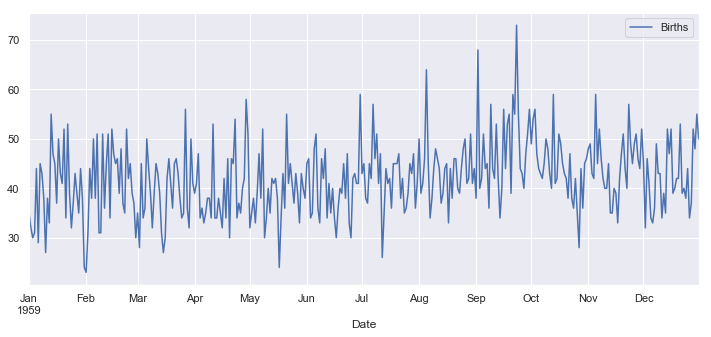

In [650]:
from statsmodels.tsa.arima_model import ARMA,ARIMA,ARMAResults,ARIMAResults,AR
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima

df1 = pd.read_csv('csv_data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df1.index.freq = 'D'

df1.plot(figsize=(12,5)) # Assume Stationary, lets check

#### Check for stationarity

In [651]:
adf_test(df1['Births']) # Perfect, it's stationary

Augmented Dickey-Fuller Test: 
ADF test statistics      -4.808291
p-value                   0.000052
# lags used               6.000000
# observations          358.000000
critical value (1%)      -3.448749
critical value (5%)      -2.869647
critical value (10%)     -2.571089
Reject Null Hypothesis
Data has no unit root and is STATIONARY


In [652]:
# Check the predicted best ARIMA model, same as in previous section ARIMA(1,1,1)
auto_arima(df1['Births'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  364
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1226.077
Method:                       css-mle   S.D. of innovations              7.000
Date:                Sun, 19 May 2019   AIC                           2460.154
Time:                        17:49:33   BIC                           2475.742
Sample:                             1   HQIC                          2466.350
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0152      0.014      1.068      0.286      -0.013       0.043
ar.L1.D.y      0.1299      0.056      2.334      0.020       0.021       0.239
ma.L1.D.y     -0.9694      0.019    -51.415      0.000      -1.006      -0.932
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            7.6996           +0.0000j            7.6996            0.0000
MA.1            1.0316           +0.0000j            1.0316            0.0000
-----------------------------------------------------------------------------
"""

In [790]:
"""
Split into training and testing set
Length of test set should be equal to the forecast size
We will do a about 2 moths -> 20% of the data
"""
from statsmodels.tsa.arima_model import ARMA,ARIMA,ARMAResults,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima

df1 = pd.read_csv('csv_data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df1.index.freq = 'D'


#### Test ARIMA(1,0,1) model

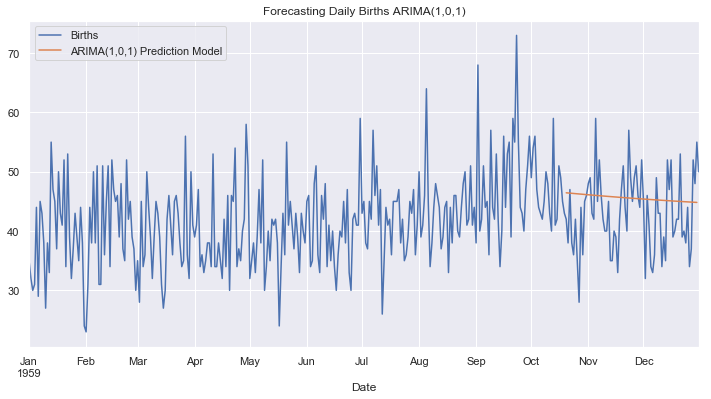

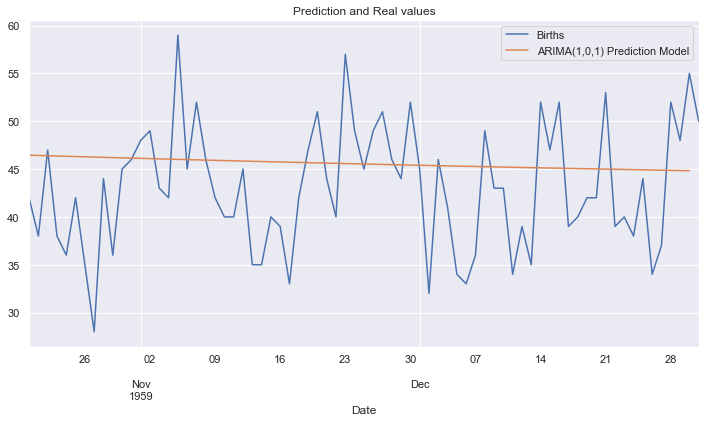

In [791]:
# Split 
train_len = int(len(df1)*0.8)
train = df1.iloc[:train_len]
test = df1.iloc[train_len:]

# Train 
model = ARIMA(train['Births'],order=(1,0,1),freq='D') 
result_1 = model.fit()
result_1.summary()

# Forecast
start_len = len(train)
end_len = len(train) + len(test) -2
prediction_1 = result_1.predict(start_len,end_len).rename('ARIMA(1,0,1) Prediction Model')


# Plot
df1.plot(legend=True,figsize=(12,6),title="Forecasting Daily Births ARIMA(1,0,1)")
prediction_1.plot(legend=True)   # Actually plots trend
plt.figure()
test['Births'].plot(figsize=(12,6),legend=True,title="Prediction and Real values")
prediction_1.plot(legend=True)   # Actually plots trend


#### Predict with ARIMA(1,1,1) model

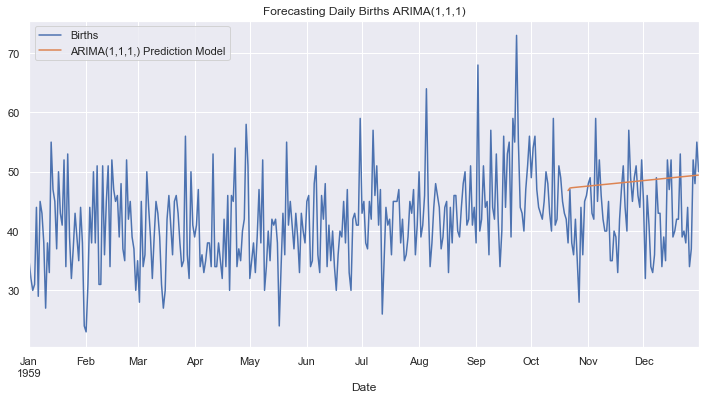

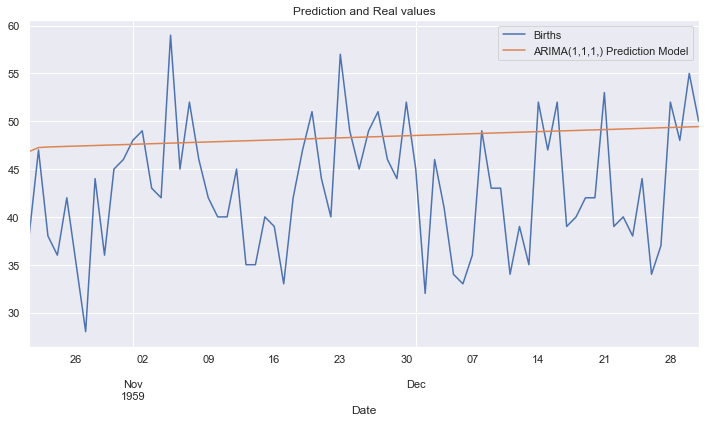

In [792]:
# Make prediciton for last years
length = len(df1)
train_len = int(length*0.8 +1)
train = df1.iloc[:train_len]
test = df1.iloc[train_len:]

model = ARIMA(train['Births'],order=(1,1,1))
result_2 = model.fit()
result_2.summary()

start = len(train)
end = len(train) + len(test) -1

# Since we now have a difference value included and not an ARMA model, we want typ="levels"
prediction_2 = result_2.predict(start=start,end=end,typ='levels').rename('ARIMA(1,1,1,) Prediction Model')

#plot
df1.plot(legend=True,figsize=(12,6),title="Forecasting Daily Births ARIMA(1,1,1)")
prediction_2.plot(legend=True)   # Actually plots trend
plt.figure()
test['Births'].plot(figsize=(12,6),legend=True,title="Prediction and Real values")
prediction_2.plot(legend=True)   # Actually plots trend

#### We check prediction of ARIMA(1,0,1) and ARIMA(1,1,1)
We will see that even though ARIMA(1,1,1) is deemed the best model...    
the prediction gives larger error for the given forecast than a ARIMA(1,0,1) model

In [706]:
print("Test mean {}".format(test.mean()) )
print("Prediction mean ARIMA(1,0,1): {}".format(prediction_1.mean()) )
print("Prediction mean ARIMA(1,1,1): {}".format(prediction_2.mean()) )
print("\n=========================\n")


pred=[prediction_1,prediction_2]
labels=['ARIMA(1,0,1)','ARIMA(1,1,1)']
for i in range(len(pred)):
    error_mse = mean_squared_error(test,pred[i])
    error_mae = mean_absolute_error(test,pred[i])
    print(f'{labels[i]} MSE was :{error_mse}')
    #print(f'{labels[i]} MSE was :{error_mae}')
    print('\n---------------------------')
    
print("In this case the ARIMA(1,1,1) is a better predictor")

Test mean Births    43.041667
dtype: float64
Prediction mean ARIMA(1,0,1): 45.576730561122034
Prediction mean ARIMA(1,1,1): 48.33777359777961


ARIMA(1,0,1) MSE was :49.11707439563739

---------------------------
ARIMA(1,1,1) MSE was :69.38711265967827

---------------------------
In this case the ARIMA(1,1,1) is a better predictor


### Now we make prediction of future values

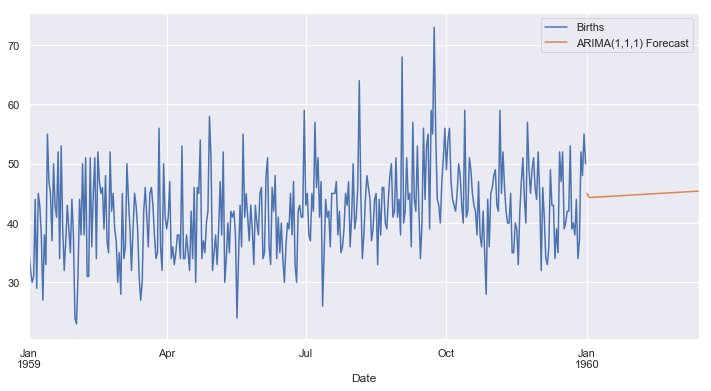

In [794]:
# Forecast 

model = ARIMA(df1['Births'],order=(1,1,1))
result = model.fit()
result.summary()
train_len = int(len(df1)*0.8)
diff_len = len(df1) - train_len

#forecast_before = result.predict(start=train_len,end=len(df1),typ='levels').rename('ARIMA(1,1,1) Forecast')
forecast_after = result.predict(start=len(df1),end=len(df1)+diff_len,typ='levels').rename('ARIMA(1,1,1) Forecast')
df1['Births'].plot(figsize=(12,6),legend=True)
#forecast_before.plot(legend=True)
forecast_after.plot(legend=True)

# Deep Learning in Time Series Analysis
- Perceptron Model
- Neural Networks
- Keras Basics for Regression Tasks
- Recurrent Neural Networks
- LSTM and GRU Neurons
- Time Series Forecasting with RNN  
  
Generally, we see Neural Network models as a black box